<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Kaggle Submission by VICTOR ISAKOV </h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Reminder: Model Analysis Tips</h3><br>
<strong>How fit should a model be?</strong><br>
As a general heuristic, if the training and testing scores are within 0.05 of each other, the model has not been overfit. Don't worry if the testing score ends up higher than the training score. Some sources claim that in such situations a model is underfit, but this is a general misconception that is beyond the scope of this course. For this course, long as the training and testing scores are within 0.05 of each other, the model is good to go.
<br><br>

<strong>Which model should I choose?</strong><br>
All models have their own benefits and drawbacks. Thus, it is important to test out more than one and to also explore their <a href="https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors">documentation</a>.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

-----------------------------------------------------------------------------------------
Analysis Introduction
----------------------------

The analysis of the bike rentals based on weather. There are a few factors that decide the number of rentals during a specific day. Some of them include Temperature, Precipitation, and Comfort of the weather. It was important to create new features to improve the predictions. I was able to combine, transform, and calculate a few new ones that improved the score. 


Exploratory Data Analysis and Data Preprocessing
------------------------------

Throughout the analysis I have discovered variables that need to be transformed to numerical values:DateHour, FuntioningDay, Holiday. These features were successfully transformed. DateHour was transformed into Year, Month, Day, Time. Further, Time, Month and Day were transformed into integers. Time was transformed from datetime into integers in a new column called Hour_Period which had a decent amount of granularity but not too much. 

Holiday was transformed from numeric to zeros(0) and ones(1). It was put into a new column called is_Holiday.
Same thing was done with FunctioningDay and put into a column called Functioning_Day.

Another important feature that was transformed was DayOfWeek. Now, instead of categorical names of the day, they became numerical in a new column called Weekday. It was a good approach to improve prediction scores.

For the Month column, instead of having numbers 9-12 I decided to switch them to 1-4. Which was made simply out of my aesthetic preference.


To impute Null values I have performed Histogram visualizations to understand distributions of those variables. For example, Visibility and Solar Radiation were strongly skewed so I used the most relevant way to impute missing values there - medians. And Dew Point Temperature was less skewed and looked more like normal distribution, but for the safer way I also chose to impute Null Values there with median.

Transformations were further 

Throughout the code I used correlation matrix to see which features affect Rentals numbers the most. Also, after imputing variables I have checked the changes in correlations and discovered that numbers didn't add significant value.

And throughout feature engineering process, I went back and forth to correlation matrix to understand if newly engineered features added value and helped with predicting Rentals.


_______________________________________________________________________
P.S. Some coding was done in various ways to show the abilities to perform tasks differently.
_______________________________________________________________________

In [1]:
## importing libraries ##

# for this template
import numpy             as np                         # mathematical essentials
import pandas            as pd                         # data science essentials
import sklearn.linear_model                            # linear models
from sklearn.model_selection import train_test_split   # train/test split
from sklearn.linear_model import LinearRegression      # Linear Regressions
from sklearn.metrics import mean_squared_error         # mean squared error 
from sklearn.preprocessing import StandardScaler       # Standard Scaler
import warnings                                        # warnings from code
from sklearn.tree import DecisionTreeRegressor         # regression trees
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.neighbors import KNeighborsRegressor      # KNN
import matplotlib.pyplot as plt                        # visualizations


# suppressing warnings
warnings.filterwarnings(action = 'ignore')

#!###############################!#
#!# import additional libraries #!#
#!###############################!#
# import whatever you need


# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




## importing data ##

# reading modeling data into Python
modeling_data = './datasets/train.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)




# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


In [2]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = "RENTALS" # this should be a "string"

<br>

<br>

In [3]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

<br>

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Data Preparation</h2><br>
Complete the following steps to prepare for model building. Note that you may add or remove steps as you see fit. Please see the assignment description for details on what steps are required for this project.
<br><br>
<h3>Base Modeling</h3>

<br><h3>Missing Value Analysis and Imputation</h3>

In [4]:
#Checking for Null Values that should be imputed

df_full.isnull().sum()

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

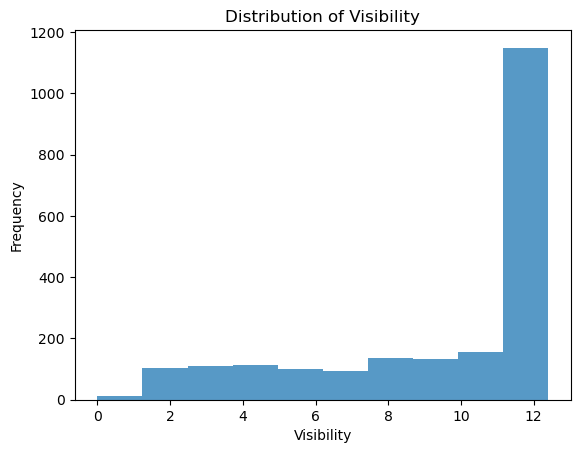

In [5]:
#Plotting the Visibility to identify how to impute Missing Values.
#It is important to understand the distribution of Visibility to find the best way of imputing null values.
#Beside that, it could be helpful to understand which weather condition - Visibility - is the most popular.
#It provides a good overview that the effect of this feature is low. As most of its values are around the value of 12,
#and very few below it. So as it is significantly left skewed, it is a solid strategy to impute missing values with median.

plt.hist(df_full['Visibility(miles)'], bins=10, alpha=0.75)
plt.title('Distribution of Visibility')
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.show()

In [6]:
#finding median of Visibility
visibility_median = df_full['Visibility(miles)'].median()

#Imputing missing values in Visibility with Median due to skewness of the distribution
df_full['Visibility(miles)'].fillna(visibility_median, inplace=True)

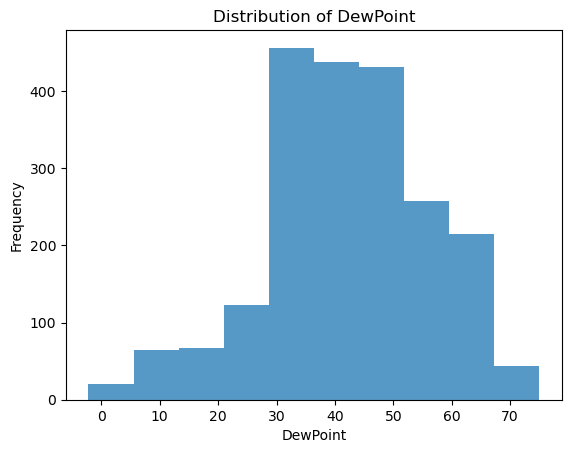

In [7]:
#Plotting the DewPoint to identify how to impute Missing Values
#Creating a similar histogram as in the previous visualization.
#It helps to understand the distribution. In this case, it looks more like a normal distribution but
#still slightly left skewed. Left side of the distribution has lower frequencies than the right one.
#So a good solution is to impute Null values with its median.

plt.hist(df_full['DewPointTemperature(F)'], bins=10, alpha=0.75)
plt.title('Distribution of DewPoint')
plt.xlabel('DewPoint')
plt.ylabel('Frequency')
plt.show()

In [8]:
#Creating medians for DewPoint to further impute the missing values
dewpoint_median = df_full['DewPointTemperature(F)'].median()

#Imputing missing values in DewPoint with Median due to a slight skewness of the distribution
df_full['DewPointTemperature(F)'].fillna(dewpoint_median, inplace=True)

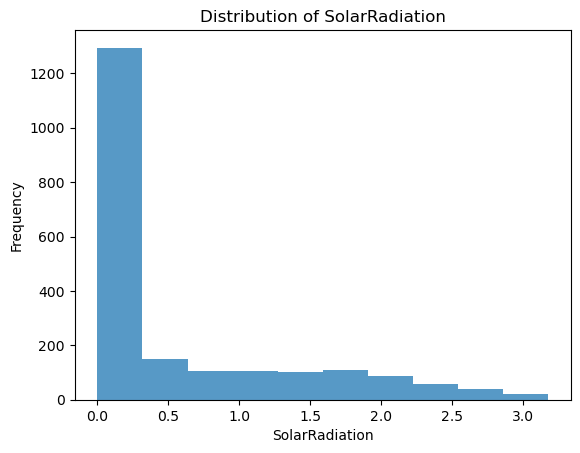

In [9]:
#Plotting the SolarRadiatioin to identify how to impute Missing Values
#The following distribution is helpful as well. It shows the distribution is strongly right skewed.
#And there are more low numbers (around zero) which is also helpful to know that most likely the effect of this feature
#is relatively low. But since it adds new information it should be considered as a feature later.
#Now, I will find the mdeian for Solar Radiation and impute the missing values with it.

plt.hist(df_full['SolarRadiation(MJ/m2)'], bins=10, alpha=0.75)
plt.title('Distribution of SolarRadiation')
plt.xlabel('SolarRadiation')
plt.ylabel('Frequency')
plt.show()

In [10]:
#finding median of SolarRadiation
solar_median = df_full['SolarRadiation(MJ/m2)'].median()

#Imputing missing values in SolarRadiation with Median due to skewness of the distribution
df_full['SolarRadiation(MJ/m2)'].fillna(solar_median, inplace=True)

In [11]:
#Checking AGAIN for Null Values if we missed any

df_full.isnull().sum()

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)           0
DewPointTemperature(F)      0
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)       0
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

<br><h3>Transformations</h3>

In [12]:
#Parsing the DateHour column into Year, Month, Day, Time.
df_full['DateHour'] = pd.to_datetime(df_full['DateHour'], infer_datetime_format=True, format='mixed') #it didn't recognize the format in some spots so I had to make it "mixed"

#Extracting each part and assigning them into a new column each
df_full['Year'] = df_full['DateHour'].dt.year
df_full['Month'] = df_full['DateHour'].dt.month
df_full['DayOfWeek'] = df_full['DateHour'].dt.day_name()
df_full['Time'] = df_full['DateHour'].dt.time

In [13]:
#Creating a column for Weekdays
df_full['Weekday'] = 0

#Iterating over each row and checking if the row matches conditions below
for index, row in df_full.iterrows():
    
    #When condition matches, assigning numbers for each day of the week
    if df_full.loc[index, "DayOfWeek"] == 'Monday':
        df_full.loc[index, 'Weekday'] = 1
        
    if df_full.loc[index, "DayOfWeek"] == 'Tuesday': #when day is Tuesday - it will become 2 in a new column
        df_full.loc[index, 'Weekday'] = 2
        
    if df_full.loc[index, "DayOfWeek"] == 'Wednesday':
        df_full.loc[index, 'Weekday'] = 3
    
    if df_full.loc[index, "DayOfWeek"] == 'Thursday':
        df_full.loc[index, 'Weekday'] = 4
        
    if df_full.loc[index, "DayOfWeek"] == 'Friday': #same logic as above
        df_full.loc[index, 'Weekday'] = 5
        
    if df_full.loc[index, "DayOfWeek"] == 'Saturday':
        df_full.loc[index, 'Weekday'] = 6
        
    if df_full.loc[index, "DayOfWeek"] == 'Sunday':
        df_full.loc[index, 'Weekday'] = 7

In [14]:
#Creating a column for Months to change them from 9-12 to 1-4
df_full['Month1'] = 0

#Iterating over each row and checking if the row matches conditions below
for index, row in df_full.iterrows():
    
    #When condition matches, assigning numbers for each month
    if df_full.loc[index, "Month"] == 9:
        df_full.loc[index, 'Month1'] = 1
        
    if df_full.loc[index, "Month"] == 10:
        df_full.loc[index, 'Month1'] = 2
        
    if df_full.loc[index, "Month"] == 11:
        df_full.loc[index, 'Month1'] = 3
    
    if df_full.loc[index, "Month"] == 12:
        df_full.loc[index, 'Month1'] = 4

In [15]:
#Creating a new column that will become numerical value of a Functioning Day
df_full['Functioning_Day'] = 0

#Iterating over each row and checking if the row says "yes"
for index, row in df_full.iterrows():
    
    #When 'FunctioningDay' column says 'yes' - it will become 1 now
    if df_full.loc[index, "FunctioningDay"] == 'Yes':
        df_full.loc[index, 'Functioning_Day'] = 1

In [16]:
#Creating a new column called is_Holiday

df_full['is_Holiday'] = 0

#Iterating over each rows and checking if the row has yes in the Holiday column
for index, row in df_full.iterrows():
    
    #When Holiday column says 'yes' - it will become 1 now
    if df_full.loc[index, "Holiday"] == 'Yes':
        df_full.loc[index, 'is_Holiday'] = 1

In [17]:
#Creating a column called Hour_Period

df_full['Hour_Period'] = 0

for index, row in df_full.iterrows():
    hour = row['Time'].hour  #Extracting the hour part from them the datetime column Time
    
    #These are the conditions that must match to be assigned a value in the new column
    if 0 <= hour < 1:
        df_full.at[index, 'Hour_Period'] = 0
    elif 1 <= hour < 2:
        df_full.at[index, 'Hour_Period'] = 1
    elif 2 <= hour < 3:
        df_full.at[index, 'Hour_Period'] = 2
    elif 3 <= hour < 4:
        df_full.at[index, 'Hour_Period'] = 3
    elif 4 <= hour < 5:
        df_full.at[index, 'Hour_Period'] = 4
    elif 5 <= hour < 6:
        df_full.at[index, 'Hour_Period'] = 5
    elif 6 <= hour < 7:
        df_full.at[index, 'Hour_Period'] = 6
    elif 7 <= hour < 8:
        df_full.at[index, 'Hour_Period'] = 7
    elif 8 <= hour < 9:
        df_full.at[index, 'Hour_Period'] = 8
    elif 9 <= hour < 10:
        df_full.at[index, 'Hour_Period'] = 9
    elif 10 <= hour < 11:
        df_full.at[index, 'Hour_Period'] = 10
    elif 11 <= hour < 12:
        df_full.at[index, 'Hour_Period'] = 11
    elif 12 <= hour < 13:
        df_full.at[index, 'Hour_Period'] = 12
    elif 13 <= hour < 14:
        df_full.at[index, 'Hour_Period'] = 13
    elif 14 <= hour < 15:
        df_full.at[index, 'Hour_Period'] = 14
    elif 15 <= hour < 16:
        df_full.at[index, 'Hour_Period'] = 15
    elif 16 <= hour < 17:
        df_full.at[index, 'Hour_Period'] = 16
    elif 17 <= hour < 18:
        df_full.at[index, 'Hour_Period'] = 17
    elif 18 <= hour < 19:
        df_full.at[index, 'Hour_Period'] = 18
    elif 19 <= hour < 20:
        df_full.at[index, 'Hour_Period'] = 19
    elif 20 <= hour < 21:
        df_full.at[index, 'Hour_Period'] = 20
    elif 21 <= hour < 22:
        df_full.at[index, 'Hour_Period'] = 21
    elif 22 <= hour < 23:
        df_full.at[index, 'Hour_Period'] = 22
    elif 23 <= hour < 24:
        df_full.at[index, 'Hour_Period'] = 23

In [18]:
#Checking if there are any other variables beside the assumed ones

value_counts = df_full['DayOfWeek'].value_counts() #For weekdays
print(value_counts)

value_counts = df_full['Month'].value_counts() #For Month
print(value_counts)

value_counts = df_full['Holiday'].value_counts() #For Holiday
print(value_counts)

value_counts = df_full['FunctioningDay'].value_counts() #For FunctioningDay
print(value_counts)

Friday       337
Saturday     312
Tuesday      312
Monday       312
Sunday       312
Thursday     311
Wednesday    288
Name: DayOfWeek, dtype: int64
10    744
9     721
12    528
11    191
Name: Month, dtype: int64
No     2064
Yes     120
Name: Holiday, dtype: int64
Yes    1937
No      247
Name: FunctioningDay, dtype: int64


<br><h3>Feature Engineering</h3>

In [19]:
#Creating a new feature called Precipitation.
#It was important to understand if there is any precipitation and how it affects the number of rentals.
#I decided to create a new feature - Precipitation - that would mean either Snow, Rain or both. 
#So adding them together made sense.
#It would be a common sense to not go on a bicyle during train or other harsh weather.
#Such feature has a better correlation than those features separetly and adds insights about weather.

df_full['Precipitation(in)'] = df_full['Snowfall(in)'] + df_full['Rainfall(in)'] #by simply adding all precipitation

In [20]:
#Creating a feature called Working_Hours.
#Based on common sense, I would assume that more people would use bikes during work time
#as a transport to work or school. It was engineered very simply - based on a normal 9-5 work day.
#Further, a column was created with zeros. And further, filter helped to iterrate over rows and define
#if a new value needs to be imputed. When hours are between 9-17 - it will impute 1, otherwise - values will stay as zeros.

df_full['Working_Hours'] = 0

for index, row in df_full.iterrows():
    hour = row['Hour_Period']  #iterrating over the rows in hours
    
    if 9 <= hour < 17:
        df_full.at[index, 'Working_Hours'] = 1 #if they match the condition - 1 is applied

In [21]:
#Creating Median of Temperatures per month per hour
#I decided to discover if a temperature above median one would make people use Bikes more.
#And I understand, that during different months and during different hours - medians will be different.
#So, I created a filter of medians of Temperatures and grouped them by Months and hours.
#Further, I created a function for running a statement with further return value.
#Such approach helps to understand whether the temperature is above median in that month and hour,
#and allows model to separate it into binary options.

medians_by_month_time = df_full.groupby(['Month1','Hour_Period'])['Temperature(F)'].median()


#iterating over rows
for month in range(1, 4):  #range is 4 becasue we have only 4 months
    for hour_period in range(24):  #and 24 hours
        median_temp = medians_by_month_time.loc[(month, hour_period)]

#creating a function that will run once called
def temp_by_day_hour(row):
    
    #pulling the medians by month and hour
    median_temp = medians_by_month_time.loc[(row['Month1'], row['Hour_Period'])]
    
    #returning 1 to the new column if the temperature is above the median during a certain month, oterwise it will become 0
    return 1 if row['Temperature(F)'] > median_temp else 0 #used such approach of utilizing return function to practice both ways

#applying function to the new column Temp_Above_Median
df_full['Temp_Above_Median'] = df_full.apply(temp_by_day_hour, axis=1)

In [22]:
#Created a feature of the condition of the Day to identify if people rent more bikes during "better days"
#It allows model to see whether the Day is a Functioning Day or not. And If the temperature is above the median.
#Such approach shows if people rent bikes more or less often during the Functioning days with a higher temperature.
#This feature brings a value of understanding customers' behavior.

#very similar approach to the previous feature creation through function
def day_conditions(row):
    if row['Temp_Above_Median'] == 1 and row['Functioning_Day'] == 1:
        return 4
    elif row['Temp_Above_Median'] == 1 and row['Functioning_Day'] == 0:
        return 3
    elif row['Temp_Above_Median'] == 0 and row['Functioning_Day'] == 1:
        return 2
    elif row['Temp_Above_Median'] == 0 and row['Functioning_Day'] == 0:
        return 1
    else:
        return 0  

#also applying the values to the new column
df_full['Day_cond'] = df_full.apply(day_conditions, axis=1)

In [23]:
#Creating variables that will have RENTALS stored during a certain month.
#This is a filter to further analyze Rentals in a specific month.

df_sorted = df_full.sort_values(['Month1', 'RENTALS'], ascending=[True, False])        #all months

df_month1 = df_full[df_full['Month1'] == 1].sort_values(by='RENTALS', ascending=False) #Sep
df_month2 = df_full[df_full['Month1'] == 2].sort_values(by='RENTALS', ascending=False) #Oct
df_month3 = df_full[df_full['Month1'] == 3].sort_values(by='RENTALS', ascending=False) #Nov
df_month4 = df_full[df_full['Month1'] == 4].sort_values(by='RENTALS', ascending=False) #Dec

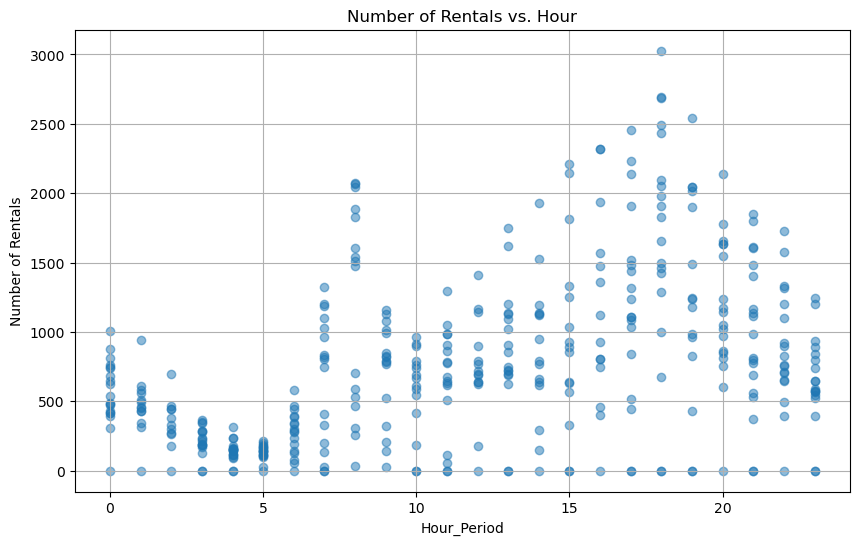

In [24]:
#Finding popular times when most rentals happened.
#This visual helps to explore and analyse which hours had most rentals.
#It was done to understand the details of each month and the popularity of each hour.
#Later, it will be used to create specific filters for a new feature - Higher_Demand
#It shows that in most months the highest demand can be seen from 9AM,10AM till 9,10PM,11PM.
#I will use it based on each month.

plt.figure(figsize=(10, 6))
plt.scatter(df_month4['Hour_Period'], df_month4['RENTALS'], alpha=0.5)   #September
# plt.scatter(df_month2['Hour_Period'], df_month2['RENTALS'], alpha=0.5) #October
# plt.scatter(df_month3['Hour_Period'], df_month3['RENTALS'], alpha=0.5) #November
# plt.scatter(df_month4['Hour_Period'], df_month4['RENTALS'], alpha=0.5) #December
# plt.scatter(df_sorted['Hour_Period'], df_sorted['RENTALS'], alpha=0.5) #All months

plt.title('Number of Rentals vs. Hour')
plt.xlabel('Hour_Period')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

In [25]:
#Creating a new feature that will show popular and unpopular time periods in each month.
#Based on the previous analysis, I identified most popular times. 
#Rentals were the highest during these hours and lower during the others.
#Such feature helps to relate the demand within a certain time period. 
#And further understanding of the specific month makes it more specific.

#month1 - Top: 10-21
#month2 - Top: 9-22
#month3 - Top: 9-23
#month4 - Top: 10-23

df_full['Higher_Demand'] = 0

for index, row in df_full.iterrows():
    hour = row['Hour_Period']  #hour
    month = row['Month1']      #month
    
    #Conditional statements for popular times in a certain month based on a previously defined filters
    if month == 1 and 10 <= hour <= 21:
        df_full.at[index, 'Higher_Demand'] = 1
    elif month == 2 and 9 <= hour <= 22:
        df_full.at[index, 'Higher_Demand'] = 1
    elif month == 3 and 9 <= hour <= 23:
        df_full.at[index, 'Higher_Demand'] = 1
    elif month == 4 and 10 <= hour <= 23:
        df_full.at[index, 'Higher_Demand'] = 1 #I prefer such method of writing loops but don't limit myself to it

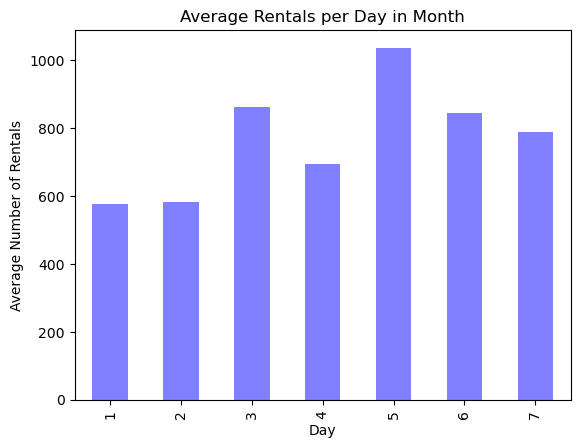

In [26]:
#Finding popular days when most rentals happened.
#The following visual helps to see distribution of average Rentals during certain days.
#It explains the days with Higher and Lower popularity.
#Throughout the visuals we see that different days during different months have various average Rentals.
#The collected data will be written down to use it for later.
#This allows to create a better feature called Popular_Day to have an understanding which days during 
#which months affect number of Rentals.

mean_rentals_per_weekday = df_month1.groupby('Weekday')['RENTALS'].mean()   #Sept
# mean_rentals_per_weekday = df_month2.groupby('Weekday')['RENTALS'].mean() #Oct
# mean_rentals_per_weekday = df_month3.groupby('Weekday')['RENTALS'].mean() #Nov
# mean_rentals_per_weekday = df_month4.groupby('Weekday')['RENTALS'].mean() #Dec
# mean_rentals_per_weekday = df_sorted.groupby('Weekday')['RENTALS'].mean() #All months




mean_rentals_per_weekday.plot(kind='bar', alpha=0.5, color='blue')

plt.title('Average Rentals per Day in Month')
plt.xlabel('Day')
plt.ylabel('Average Number of Rentals')

plt.show()

In [27]:
#Popular Days Feature
#It is a similar feature that explains if a day had more rentals.
#I decided to add it after analysis of the number of rentals in a specific day.
#It provides new information if the day is popular.
#Despite that, it might overfit model later as these hours might be unique to the months
#they were discovered in and predict worse during new months. As those time periods might have different popularity.

#month1 - Popular: 3,5,6,7
#month2 - Popular: 1,4,5,6
#month3 - Popular: 2,4,6,7
#month4 - Popular: 1,4,6


df_full['Popular_Day'] = 0

for index, row in df_full.iterrows():
    day = row['Weekday']  #A certain day
    month = row['Month1'] #A certain month
    
    #Popular months based on the previous analysis
    if month == 1 and day in [3,5,6]:
        df_full.at[index, 'Popular_Day'] = 1
    elif month == 2 and day in [1,2,4,5,6,7]:
        df_full.at[index, 'Popular_Day'] = 1
    elif month == 3 and day in [2,3,4,6,7]:
        df_full.at[index, 'Popular_Day'] = 1
    elif month == 4 and day in [1,4,6,7]:
        df_full.at[index, 'Popular_Day'] = 1

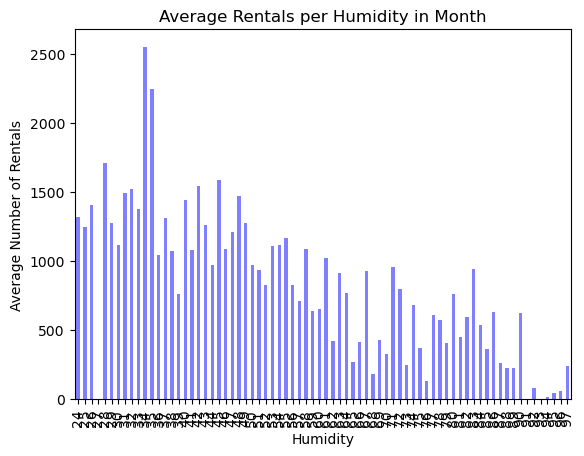

In [28]:
#Finding which Humidity levels had higher rentals.
#Such approach of analyzing Humidity helps to understand if low humidity increases rental numbers.
#In this case it does, and it's a factor that is related.
#Analyzing it by month improves the granularity and allows to tailor the new feature ranges better.
#So, the visualization shows which Humidity level ranges had the highest mean rentals and if they were above 1k.
#Also, the numbers were written down to implement them in a new feature.

mean_humidity_per_month = df_month1.groupby('Humidity(%)')['RENTALS'].mean()   #Sept
# mean_humidity_per_month = df_month2.groupby('Humidity(%)')['RENTALS'].mean() #Oct
# mean_humidity_per_month = df_month3.groupby('Humidity(%)')['RENTALS'].mean() #Nov
# mean_humidity_per_month = df_month4.groupby('Humidity(%)')['RENTALS'].mean() #Dec
# mean_humidity_per_month = df_sorted.groupby('Humidity(%)')['RENTALS'].mean() #All months




mean_humidity_per_month.plot(kind='bar', alpha=0.5, color='blue')

plt.title('Average Rentals per Humidity in Month')
plt.xlabel('Humidity')
plt.ylabel('Average Number of Rentals')

plt.show()

In [29]:
#Low Humidity Feature based on analyzing Humidity.
#I called it low Humidity, because if the Humidity was in a certain range (usually lower range),
#it would have higher rentals. Beside that, this feature represents Humidity levels
#where the most rentels happened. And a factor of deviding it by month, helps to improve granularity
#and make it a feature that adds value to the model. It created a slightly higher correlation with Rentals.
#Another point, is I used it in creation of another feature that became a vary improtant mixed feature.


#month1 - Low: <55
#month2 - Low: <62
#month3 - Low: many...
#month4 - Low: 27<x<52

df_full['Low_Humidity'] = 0  #Creating a column with zeros

for index, row in df_full.iterrows():
    humidity = row['Humidity(%)']  #Humidity
    month = row['Month1']
    
    #Defining conditions and imputing the column if it matches the condition
    if month == 1 and humidity < 55:
        df_full.at[index, 'Low_Humidity'] = 1
    elif month == 2 and humidity < 62:
        df_full.at[index, 'Low_Humidity'] = 1
    elif month == 3 and (humidity == 19 or 22 < humidity <25 or 27 < humidity < 37 or humidity==38 or humidity ==41 or humidity==43 or humidity==46 or 48 < humidity < 56 or humidity == 58 or humidity ==63 or humidity ==66):
        df_full.at[index, 'Low_Humidity'] = 1
    elif month == 4 and 27 < humidity < 52:
        df_full.at[index, 'Low_Humidity'] = 1

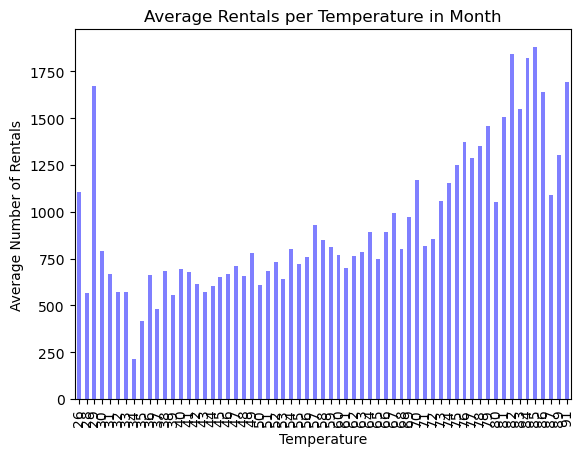

In [30]:
#Analyzing Temperatures that had the most Rentals.
#Another analsis that was a common sense to me to create a new feature. Visualizing Temperatures with the
#highest rentals helps to figure "better" temperatures for biking.
#Some insights were, that it doesn't have to be warm or chill to ride a bike.
#Another point, is that on average, high temperature increases number of bike rentals, but in many cases it varies.
#That's why I created certain ranges of temperatures.
#Potentially, this approach might overfit model which should be taken into consideration.

# mean_humidity_per_month = df_month1.groupby('Temperature(F)')['RENTALS'].mean()   #Sept
# mean_humidity_per_month = df_month2.groupby('Temperature(F)')['RENTALS'].mean() #Oct
# mean_humidity_per_month = df_month3.groupby('Temperature(F)')['RENTALS'].mean() #Nov
# mean_humidity_per_month = df_month4.groupby('Temperature(F)')['RENTALS'].mean() #Dec
mean_humidity_per_month = df_sorted.groupby('Temperature(F)')['RENTALS'].mean() #All months




mean_humidity_per_month.plot(kind='bar', alpha=0.5, color='blue')

plt.title('Average Rentals per Temperature in Month')
plt.xlabel('Temperature')
plt.ylabel('Average Number of Rentals')

plt.show()

In [31]:
#Warmth Feature per month.
#Based on the previous analysis, I have discovered ranges of Temperatures when more Rentals appeared.
#It was at first based on the assumption that warmer weather to a certain point increases bikes rented.
#Later it was mostly disproved, because there were many rentals during certain low temperatures as well.
#Although, those could be some outliers or in different regions. 
#So, engineering this feature helped to understand if "warmth" affected rentals.
#I started by creating an empty list, and then adding filters for rows.

df_full['Warmth'] = 0  #Empty column with zeros

for index, row in df_full.iterrows():
    temp = row['Temperature(F)']  
    month = row['Month1']
    
    #Defining Low Temperatures for each month and imputing the new column with 1 if they match
    if month == 1 and (temp == 35 or temp==38 or temp==40 or temp==57 or temp >=62):
        df_full.at[index, 'Warmth'] = 1
    elif month == 2 and (temp == 32 or 46 <= temp <= 70 or 73 <= temp <=79 or temp >= 81):
        df_full.at[index, 'Warmth'] = 1
    elif month == 3 and (temp == 26 or temp ==29 or temp==37 or temp==38 or 40 <= temp <= 43 or temp==45 or temp ==49 or 54 <= temp <= 61 or temp >=63):
        df_full.at[index, 'Warmth'] = 1
    elif month == 4 and temp >= 70:
        df_full.at[index, 'Warmth'] = 1

In [32]:
#Creating a weather comfort index - based on Temperature - Humidity (based on the articles I read).
#My basic assumption was that Higher Humidity might affect likelihood of renting a bike.
#I decided to subtract Humidity from Temperature to balance them out.
#It should propose a metric of how it would feel outside during a certain Temperature and Humidity.
#Creating this feature helped model to understand Rental amount better.
#Moreover, I utilized it in another feature creation.

df_full['Comfort_Index'] = (df_full['Temperature(F)']/100) - (df_full['Humidity(%)']/100)

In [33]:
#Best Rental Time based on the analysis of features correlations.
#I decided that I need an "ULTRA" feature that would combined other important metrics.
#And I even called it Best Rental Time(Best_Rent_T). 
#I have discovered that this feature could merge different indexes and assigning various weights would be helpful.
#Using a method of trial and error I learnt which features should have which weights and
#if any of them must be "standardized". It combined the Comfort Index with a value of 4,
#Functioning Day with a value of 5, Higher Demand with a value of 3, Low Humidity with a value of 2,
#Day condition devided by 4 (*0.25 as it had a scale of 4) and a weight of 1, and Warmth with a weight of 1.
#At the point, such feature provided a high correlation of 0.69 with the Rentals and improved my model performance.
#I believe, such feature is a good example but could also overfit the model depending on which dataset it will be further used.


df_full['Best_Rent_T'] = ((df_full['Comfort_Index'])*4 + (df_full['Functioning_Day'])*5 + (df_full['Higher_Demand'])*3 + (df_full['Low_Humidity'])*2 + (df_full['Day_cond']*0.25)*1 + (df_full['Warmth'])*1)

In [34]:
#Creating a feature - if there is any precipitation or not.
#This feature is very simple and provides the model with a simple "yes" or "no" answer.
#It was a straight forward assumption for me that Precipitation should significantly affect number of Rentals.
#But in this case it wasn't so powerful.
#This feature could be good for a Decision Tree but could be not as helpful in some other models.
#In my case, I created it to understand how much Precipitation affects the outcome.
#It didn't become a very helpful feature but it played a good role in DecisionTree model experimentation.

def precipitation(row):
    if row['Precipitation(in)'] > 0:
        return 0
    else:
        return 1
df_full['Pr1'] = df_full.apply(precipitation, axis=1) #applying the function returened values to the new column

In [35]:
#Creating feature for work week.
#Another feature that makes sense in real world.
#Usually, it would be understandable that numbers would vary based on the weekdays or weekend.
#It made sense to make Monday - Friday as a workweek. And Saturday and Sunday as weekend.
#I decided to make it binary to make it simple. 
#Further from the correlation I discovered that it wasn't such a strong correlation but it added value to my model. 

def week(row):
    if row['Weekday'] in [1,2,3,4,5]: #Mon, Tue, Wed, Thu, Fri
        return 1
    else:                             #Sat, Sun
        return 0

df_full['Week'] = df_full.apply(week, axis=1) #applying the function returened values to the new column

In [36]:
#Creating an Availability of the place and people (Perfect Day).
#I decided to discover if availability of customers and the bike rentals would be impactful
#(based on assumptions that during the weekend more people will rest)
#And when the day is not a functioning day - less rentals will happen.
#Creating a combined availability would improve score of correlation with Rentals.
#Sadly, it didn't create a good correlation and my assumptions were wrong 
#but adding this feature to the Decision Tree improved the score so I kept it.

def availability(row):
    if row['Week'] == 1 and row['Functioning_Day'] == 1:
        return 4
    elif row['Week'] == 1 and row['Functioning_Day'] == 0:
        return 3
    elif row['Week'] == 0 and row['Functioning_Day'] == 1:
        return 2
    elif row['Week'] == 0 and row['Functioning_Day'] == 0:
        return 1
    else:
        return 0  

df_full['Perfect_Day'] = df_full.apply(availability, axis=1) #applying the function returened values to the new column

In [37]:
#Multiplying Temperature and Solar (To see how strong heat affect people).
#It is the direct impact of Solar Radiation and actual temperature.
#It wasn't so easy to identify. Amd after some research it came to my mind that 
#multiplying these might give a better outcome. 
#So combined effect of these features adds to the model how strong the Sunlight actually affects likelyhood to bike.
#It is a simple multiplication of Temperature and Solar radiation which provide intensity index.

df_full['Heat'] = df_full['Temperature(F)'] * df_full['SolarRadiation(MJ/m2)']

In [38]:
#Multiplying Hour by Day to identify the most intense times during Functioning days.
#At first, it was a complicated approach to create a metric that will become a scale. But after the previous Heat feature,
#it was a common sense to try using this approach further. 
#And it worked very well by providing the scale of which hours during functioning days get higher rentals.
#I thought that specific hours during functioning days might increase the chance by the model to recognize the 
#predictions of Rentals. It has a high correlation


df_full['HF'] = df_full['Hour_Period'] * df_full['Functioning_Day'] 

In [39]:
#If there is rain, there might be less rentals.
#This is a similar feature as precipitation. But based on correlation matrix, 
#it provides model with a higher correlation with Rentals.
#I decided to keep it because I also checked how it affects the output. And for KNN it provided value and improved scores.
#Also, it is commong sense that knowing if there is rain would stop some people from going out.


def has_Rain(row):
    if row['Rainfall(in)'] > 0:
        return 1
    else:
        return 0
df_full['has_Rain'] = df_full.apply(has_Rain, axis=1) #applying the function returened values to the new column

In [40]:
#Dropping unused and categorical columns
df_full=df_full.drop(["Month", "Holiday", "FunctioningDay",
                        "DayOfWeek",'DateHour','Year'], axis = 1) 

In [41]:
df_full.columns #checking all columns

Index(['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'RENTALS', 'set', 'Time', 'Weekday', 'Month1', 'Functioning_Day', 'is_Holiday', 'Hour_Period', 'Precipitation(in)', 'Working_Hours', 'Temp_Above_Median', 'Day_cond', 'Higher_Demand', 'Popular_Day', 'Low_Humidity', 'Warmth', 'Comfort_Index', 'Best_Rent_T', 'Pr1', 'Week', 'Perfect_Day', 'Heat', 'HF', 'has_Rain'], dtype='object')

In [42]:
#Creating a correlation Matrix
new_corr = df_full.corr(method = 'pearson').round(decimals = 2)
        
#checking the correlations of the newly-created variables with RENTALS
new_corr.loc[['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)',
               'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)',
               'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Weekday', 
               'Month1', 'Functioning_Day', 'Hour_Period', 'Precipitation(in)', 
               'Working_Hours', 'Temp_Above_Median', 'Day_cond', 'Higher_Demand',
               'Low_Humidity', 'Comfort_Index', 'Warmth', 'Best_Rent_T', 'Pr1', 
               'Week', 'Perfect_Day', 'Heat', 'HF','has_Rain'], 
            ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)',
               'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)',
               'Snowfall(in)', 'SolarRadiation(MJ/m2)',  'Weekday', 
               'Month1', 'Functioning_Day', 'Hour_Period', 'Precipitation(in)', 
               'Working_Hours', 'Temp_Above_Median', 'Day_cond', 'Higher_Demand',
               'Low_Humidity', 'Comfort_Index', 'Warmth', 'Best_Rent_T', 'Pr1', 
               'Week', 'Perfect_Day', 'Heat', 'HF','has_Rain','RENTALS']].sort_values(by = 'RENTALS',
                                                             ascending = False)

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Weekday,Month1,Functioning_Day,Hour_Period,Precipitation(in),Working_Hours,Temp_Above_Median,Day_cond,Higher_Demand,Low_Humidity,Comfort_Index,Warmth,Best_Rent_T,Pr1,Week,Perfect_Day,Heat,HF,has_Rain,RENTALS
Best_Rent_T,0.42,-0.65,0.33,-0.01,-0.06,-0.09,-0.08,0.53,0.05,0.02,0.48,0.48,-0.11,0.49,0.19,0.33,0.73,0.72,0.74,0.50,1.00,0.15,-0.01,0.16,0.53,0.64,-0.12,0.69
HF,0.10,-0.25,0.20,0.05,-0.07,-0.00,0.02,0.05,0.07,0.07,0.49,0.82,0.00,0.09,-0.03,0.12,0.59,0.29,0.25,0.19,0.64,0.01,-0.02,0.15,0.05,1.00,-0.03,0.62
Comfort_Index,0.63,-0.84,0.36,-0.02,-0.01,-0.18,-0.22,0.64,-0.06,-0.06,-0.04,0.32,-0.25,0.50,0.35,0.32,0.53,0.69,1.00,0.42,0.74,0.33,0.05,0.03,0.66,0.25,-0.25,0.48
Functioning_Day,-0.12,-0.03,-0.01,-0.04,-0.12,-0.01,0.04,0.00,0.16,0.14,1.00,-0.01,0.00,0.00,-0.05,0.26,0.01,0.05,-0.04,0.12,0.48,-0.03,-0.05,0.29,-0.00,0.49,0.00,0.45
Higher_Demand,0.29,-0.48,0.36,0.10,-0.05,-0.01,0.02,0.42,-0.00,0.07,0.01,0.70,0.00,0.53,0.00,0.01,1.00,0.48,0.53,0.24,0.73,0.02,0.00,0.01,0.41,0.59,-0.03,0.44
Hour_Period,0.19,-0.28,0.25,0.09,0.00,0.03,-0.00,0.05,-0.00,0.00,-0.01,1.00,0.02,0.10,0.01,0.01,0.70,0.31,0.32,0.16,0.48,0.01,0.00,-0.00,0.06,0.82,-0.01,0.42
Low_Humidity,0.22,-0.73,0.27,0.05,-0.26,-0.11,-0.09,0.49,-0.04,-0.02,0.05,0.31,-0.14,0.40,-0.00,0.01,0.48,1.00,0.69,0.26,0.72,0.21,0.02,0.04,0.49,0.29,-0.18,0.41
Warmth,0.55,-0.15,0.10,-0.13,0.34,-0.02,-0.11,0.27,0.00,-0.36,0.12,0.16,-0.06,0.19,0.37,0.39,0.24,0.26,0.42,1.00,0.50,0.06,-0.02,0.02,0.30,0.19,0.01,0.37
Temperature(F),1.00,-0.11,0.21,-0.17,0.75,0.02,-0.18,0.41,0.03,-0.34,-0.12,0.19,-0.06,0.29,0.73,0.67,0.29,0.22,0.63,0.55,0.42,0.04,-0.05,-0.09,0.48,0.10,0.06,0.32
Day_cond,0.67,0.05,0.03,-0.24,0.58,-0.01,-0.09,0.12,0.06,0.05,0.26,0.01,-0.04,-0.00,0.95,1.00,0.01,0.01,0.32,0.39,0.33,0.00,-0.05,0.04,0.19,0.12,0.05,0.30


<br><h3>Standardization</h3>

In [43]:
## Standardization ##

#SCALING


scaled_features=['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)',
               'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)',
               'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Weekday', 
               'Month1', 'Functioning_Day', 'Hour_Period', 'Precipitation(in)', 
               'Working_Hours', 'Temp_Above_Median', 'Day_cond', 'Higher_Demand',
               'Low_Humidity', 'Comfort_Index', 'Warmth', 'Best_Rent_T', 'Pr1', 
               'Week', 'Perfect_Day', 'Heat', 'HF','has_Rain']

scaler = StandardScaler()

df_full[scaled_features] = scaler.fit_transform(df_full[scaled_features])

df_full.head()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS,set,Time,Weekday,Month1,Functioning_Day,is_Holiday,Hour_Period,Precipitation(in),Working_Hours,Temp_Above_Median,Day_cond,Higher_Demand,Popular_Day,Low_Humidity,Warmth,Comfort_Index,Best_Rent_T,Pr1,Week,Perfect_Day,Heat,HF,has_Rain
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,-0.419144,1.165364,-1.422139,-1.975852,0.317032,-0.130085,-0.108634,-0.651443,519.0,Not Kaggle,05:59:54.810000,0.988788,-0.209104,0.357095,0,-0.939175,-0.160345,-0.707107,1.037326,1.112634,-1.127063,1,-0.849940,0.948225,-1.140508,-0.633696,0.245345,-1.581139,-1.394446,-0.610538,-0.693812,-0.212076
mb_1330,-0.496912,-0.333392,-0.552855,0.574230,-0.495855,-0.130085,-0.108634,0.612391,1251.0,Not Kaggle,08:59:53.355000,-0.011218,-0.209104,0.357095,0,-0.505740,-0.160345,-0.707107,-0.964017,-0.822844,-1.127063,1,1.176554,0.948225,-0.006768,0.084170,0.245345,0.632456,0.725617,0.313211,-0.291666,-0.212076
mb_551,-0.108071,-0.547500,-0.407974,-1.830961,-0.234570,-0.130085,-0.108634,-0.651443,1685.0,Not Kaggle,21:59:57.250000,0.988788,-1.077321,0.357095,0,1.372477,-0.160345,-0.707107,-0.964017,-0.822844,0.887262,1,1.176554,-1.054602,0.371146,0.740821,0.245345,-1.581139,-1.394446,-0.610538,1.450966,-0.212076
mb_2103,0.902916,-1.457458,3.117455,0.777078,-0.241828,-0.130085,-0.108634,2.301674,0.0,Not Kaggle,14:00:00,-1.011224,1.527331,-2.800376,0,0.361129,-0.160345,1.414214,1.037326,0.144895,0.887262,0,1.176554,-1.054602,1.630857,-0.246939,0.245345,0.632456,-0.334415,2.309735,-1.364055,-0.212076
mb_1430,-0.341375,-2.099782,-0.214800,0.313426,-2.114371,-0.130085,-0.108634,1.801145,814.0,Not Kaggle,12:59:52.855000,-1.511227,-0.209104,0.357095,0,0.072173,-0.160345,1.414214,-0.964017,-0.822844,0.887262,1,1.176554,0.948225,1.462895,1.308436,0.245345,0.632456,0.725617,1.252382,0.244528,-0.212076


<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Data Partitioning</h2><br>
This is a very important step for your submission on Kaggle. Make sure to complete your data preparationbefore moving forward.
<br>
<br><h3>Separating the Kaggle Data</h3><br>

In [44]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

In [45]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
#Creating a perfect mix of features

x_features = ['Temperature(F)', 'Humidity(%)', 
              'Functioning_Day', 'Hour_Period', 
              'Working_Hours', 'SolarRadiation(MJ/m2)',
              'has_Rain', 'Month1','Heat', 'HF', 
              'Best_Rent_T','Week'] 

<br><h3>Train-Test Split</h3><br>
Note that the following code will remove non-numeric features, keeping only integer and float data types. It will also remove any observations that contain missing values. This is to prevent errors in the model building process. 

<br>

In [46]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 31


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 12


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 12


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Candidate Modeling</h2><br>
Develop your candidate models below.

---------------------------------------------------
For candidate models I considered all. Before running any, I knew that linear models and such type of relationships in real life is very rare. So I decided to try with Decision Tree model.
After trying it and getting a fair score (first model that I submitted and got a score of 0.50+ in the leader board), I decided to try improving it. It helped and my next submission was 0.70+ points.
After some further feature engineering, I decided to go through other models to either prove or disprove my hypothesis of non-linear relationships between weather conditions and bike rental amounts.

Linear models didn't bring any true success, so I moved on to KNN. At first, I fed all the features to it but it gave me a lower score of around 0.50+, which wasn't the greatest, didn't have a good prediction score, and I went to read more about KNN models preferences. I identified that less features is better for it, which was my next step.
By limiting features and adjusting the "mix" it helped me to achieve a training score of 0.827. It was one of the highest score I had. So I submitted the model and it performed the best reaching 0.77+ score on the leader board.

(My 2nd and 3rd best models were Decision Tree and Ridge that got high scores and smaller train-test gap, but didn't score higher on the Leader board. All of these models were tuned and reached higher scores of predictions than before tuning.)

--------------------------------------------------------------------------------------------

In [47]:
## Candidate Modeling ##
from sklearn.tree import DecisionTreeRegressor         # regression trees

# naming the model
model_name = 'DecisionTree' 

# model type
model = sklearn.tree.DecisionTreeRegressor() # model type 

<br>

In [48]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     DecisionTree
Train_Score:    0.9998
Test_Score:     0.6146
Train-Test Gap: 0.3852



<br>
<h3>Model Results</h3><br>
Remember that some models have coefficients, visual outputs, etc. Make sure to analyze relevant results for the models you build.

In [49]:
## Model Results ##

# Model Name:     DecisionTree
# Train_Score:    0.9998
# Test_Score:     0.6316
# Train-Test Gap: 0.3682

<br>
<h3>Residual Analysis</h3><br>

In [50]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)


#!###########################!#
#!# add more code as needed #!#
#!###########################!#



,True,Predicted
ID,,
mb_1509,908.0,851.0
mb_559,131.0,72.0
mb_040,1208.0,1168.0
mb_1346,291.0,496.0
mb_1463,1433.0,1535.0


<br>
<h3>Hyperparameter Tuning</h3><br>

In [51]:
# # declaring a hyperparameter space
# criterion_range   = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
# splitter_range    = ["best","random"]
# depth_range       = np.arange(1,11,1)
# leaf_range        = np.arange(1,251,5)
# min_samples_split = np.arange(2, 10, 20)


# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_range,
#               'splitter'         : splitter_range,
#               'max_depth'        : depth_range,
#               'min_samples_leaf' : leaf_range,
#               'min_samples_split': min_samples_split}


# # INSTANTIATING the model object without hyperparameters
# tuned_tree = DecisionTreeRegressor(random_state = 219)


# # RandomizedSearchCV object
# tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, #model
#                                    param_distributions   = param_grid, #hypermarameter ranges
#                                    cv                    = 5, #folds
#                                    n_iter                = 1000, #how many models to build
#                                    random_state          = 702)


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(x_data, y_data)


# # printing the optimal parameters and best score
# print("Tuned Parameters        :", tuned_tree_cv.best_params_)
# print("Tuned Training R-Squared:", tuned_tree_cv.best_score_.round(4))



In [52]:
# naming the model
model_name = "Tuned Tree"


# INSTANTIATING a logistic regression model with tuned values
model = DecisionTreeRegressor(splitter="best",
                              min_samples_split = 2,
                              min_samples_leaf=11,
                              max_depth=9,
                              criterion="poisson",
                              random_state=702)


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8441
Testing Score  : 0.7333
Train-Test Gap : 0.1108


In [53]:
# Training Score : 0.8441
# Testing Score  : 0.7333
# Train-Test Gap : 0.1108

In [54]:
# naming the model
model_name = "Lasso Unscaled"


# INSTANTIATING model object
model = sklearn.linear_model.Lasso(alpha        = 1.0,
                                   fit_intercept=False,
                                   max_iter = 2000,
                                   random_state = 702)


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : -0.9925
Testing Score  : -0.8782
Train-Test Gap : 0.1143


In [55]:
# Training Score : -0.9925
# Testing Score  : -0.8782
# Train-Test Gap : 0.1143

In [56]:
# Setting a model name
model_name = "Ridge Scaled"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Ridge(alpha=1,
                                   random_state=702)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Model Name:',model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Model Name: Ridge Scaled
Training Score : 0.6057
Testing Score  : 0.5982
Train-Test Gap : 0.0075


In [57]:
# Training Score : 0.6057
# Testing Score  : 0.5982
# Train-Test Gap : 0.0075

In [58]:
# # declaring a hyperparameter space
# alpha_range = np.logspace(-4, 0, 50)  #range of values between 0.0001 and 1
# solver_range = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]

# # creating a hyperparameter grid
# param_grid = {'alpha': alpha_range,
#               'solver': solver_range}

# # INSTANTIATING the model object without hyperparameters
# tuned_ridge = sklearn.linear_model.Ridge(random_state=219)

# # RandomizedSearchCV object
# tuned_ridge_cv = RandomizedSearchCV(estimator=tuned_ridge, # model
#                                     param_distributions=param_grid, # hypermarameter ranges
#                                     cv=5, # folds
#                                     n_iter=2000, # how many models to build, reduced for efficiency
#                                     random_state=702)

# # Assuming x_data and y_data are your features and target variable
# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_ridge_cv.fit(x_data, y_data)

# # printing the optimal parameters and best score
# print("Tuned Parameters        :", tuned_ridge_cv.best_params_)
# print("Tuned Training R-Squared:", tuned_ridge_cv.best_score_.round(4))

In [59]:
# Setting a model name
model_name = "Ridge Scaled Tuned"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Ridge(alpha=1.0,
                                   solver='lsqr',
                                   random_state=702)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Model Name:',model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Model Name: Ridge Scaled Tuned
Training Score : 0.6057
Testing Score  : 0.5982
Train-Test Gap : 0.0075


In [60]:
# RESULTS
# Training Score : 0.6057
# Testing Score  : 0.5982
# Train-Test Gap : 0.0075

In [61]:
# Setting a model name
model_name = "Elastic Net Scaled"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.SGDRegressor(alpha = 2.0,
                                          penalty = "elasticnet", 
                                          random_state = 702)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(decimals = 4)
model_test_score  = model.score(x_test, y_test)  .round(decimals = 4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.4856
Testing Score  : 0.454
Train-Test Gap : 0.0316


In [62]:
# Training Score : 0.4856
# Testing Score  : 0.454
# Train-Test Gap : 0.0316

In [63]:
#Model name
model_name = "Linear Regression"

# INSTANTIATING a model object -  LinearRegression
model = LinearRegression()

# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(decimals = 4)
model_test_score  = model.score(x_test, y_test).round(decimals = 4)
model_gap         = abs(model_train_score - model_test_score).round(4)

# Displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)


Training Score : 0.6057
Testing Score  : 0.5984
Train-Test Gap : 0.0073


In [64]:
# Training Score : 0.6057
# Testing Score  : 0.5984
# Train-Test Gap : 0.0073

In [65]:
## Candidate Modeling ##
from sklearn.neighbors import KNeighborsRegressor         # regression trees

# naming the model
model_name = 'KNN' # name your model

# model type
model = sklearn.neighbors.KNeighborsRegressor()

In [66]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     KNN
Train_Score:    0.843
Test_Score:     0.7992
Train-Test Gap: 0.0438



In [67]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 20)


#!###########################!#
#!# add more code as needed #!#
#!###########################!#

,True,Predicted
ID,,
mb_1509,908.0,1061.2
mb_559,131.0,179.4
mb_040,1208.0,1179.4
mb_1346,291.0,474.4
mb_1463,1433.0,1193.6
mb_093,1930.0,1644.0
mb_938,806.0,463.8
mb_1785,260.0,342.6
mb_2127,948.0,992.4


In [68]:
# # declaring a hyperparameter space
# n_neighbors_range = np.arange(1, 31, 1)
# weights_options = ['uniform', 'distance']
# p_options = [1, 2]
# algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# leaf_size = np.arange(10, 51, 15)

# # creating a hyperparameter grid
# knn_hyperparameters = {
#     'n_neighbors': n_neighbors_range,
#     'weights': weights_options,
#     'p': p_options,
#     'algorithm': algorithm,
#     'leaf_size': leaf_size
# }


# # INSTANTIATING the model object without hyperparameters
# tuned_KNN = KNeighborsRegressor()


# # RandomizedSearchCV object
# tuned_KNN_cv = RandomizedSearchCV(estimator             = tuned_KNN, #model
#                                    param_distributions   = knn_hyperparameters, #hypermarameter ranges
#                                    cv                    = 5, #folds
#                                    n_iter                = 4000, #how many models to build
#                                    random_state          = 702)


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_KNN_cv.fit(x_data, y_data)


# # printing the optimal parameters and best score
# print("Tuned Parameters        :", tuned_KNN_cv.best_params_)
# print("Tuned Training R-Squared:", tuned_KNN_cv.best_score_.round(4))

In [69]:
# naming the model
model_name = "Tuned KNN"


# INSTANTIATING a logistic regression model with tuned values
model = KNeighborsRegressor(weights="distance",
                            p=1,
                            n_neighbors=6,
                            leaf_size=10,
                            algorithm="auto")


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.9998
Testing Score  : 0.827
Train-Test Gap : 0.1728


In [70]:
# Training Score : 0.9998
# Testing Score  : 0.827
# Train-Test Gap : 0.1728

This was the best model which I submitted to Kaggle. It received a highest score of 0.77+ in the leader board.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Preparing Submission File for Kaggle</h2><br>
The code below will store the predicted values for each of the models above.

In [71]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

<br>
<h3>Creating the Kaggle File</h3><br>

In [72]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

model_pred_df.head(10)

,RENTALS
ID,
mb_382,1601.635847
mb_547,1721.788068
mb_578,711.378589
mb_187,2143.473066
mb_227,977.495361
mb_476,1877.628422
mb_395,1437.180669
mb_520,1187.643208
mb_1156,432.055390


<br>

In [73]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# name your model
model_pred_df.to_csv(path_or_buf = "./model_output/KNN_Final.csv",
                     index       = True,
                     index_label = 'ID')

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~

  _    _                           __  __           _      _ _             _ 
 | |  | |                         |  \/  |         | |    | (_)           | |
 | |__| | __ _ _ __  _ __  _   _  | \  / | ___   __| | ___| |_ _ __   __ _| |
 |  __  |/ _` | '_ \| '_ \| | | | | |\/| |/ _ \ / _` |/ _ \ | | '_ \ / _` | |
 | |  | | (_| | |_) | |_) | |_| | | |  | | (_) | (_| |  __/ | | | | | (_| |_|
 |_|  |_|\__,_| .__/| .__/ \__, | |_|  |_|\___/ \__,_|\___|_|_|_| |_|\__, (_)
              | |   | |     __/ |                                     __/ |  
              |_|   |_|    |___/                                     |___/   

                                                            

~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>